In [0]:
!pip install -U -q PyDrive

import numpy as np
import pandas as pd

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt




In [0]:

df=pd.read_csv('finalbeatcount.csv',sep=',')

In [24]:
df.columns

Index(['Only Date', '111', '112', '113', '114', '121', '122', '123', '124',
       '131',
       ...
       '2521', '2522', '2523', '2524', '2525', '2531', '2532', '2533', '2534',
       '2535'],
      dtype='object', length=305)

In [25]:
print('Length : ',len(df))
length = len(df)
df.head(5)

Length :  6541


,Only Date,111,112,113,114,121,122,123,124,131,132,133,134,211,212,213,214,215,221,222,223,224,225,231,232,233,234,235,310,311,312,313,314,321,322,323,324,331,332,333,...,2213,2221,2222,2223,2232,2233,2234,2311,2312,2313,2322,2323,2324,2331,2332,2333,2411,2412,2413,2422,2423,2424,2431,2432,2433,2511,2512,2513,2514,2515,2521,2522,2523,2524,2525,2531,2532,2533,2534,2535
0,2001-01-01,5.0,2.0,2.0,0.0,0.0,8.0,1.0,3.0,3.0,11.0,1.0,1.0,9.0,7.0,3.0,4.0,0.0,3.0,5.0,2.0,1.0,0.0,4.0,12.0,5.0,6.0,0.0,0.0,7.0,12.0,9.0,10.0,5.0,3.0,12.0,8.0,11.0,7.0,3.0,...,13.0,6.0,8.0,2.0,8.0,10.0,4.0,6.0,3.0,6.0,4.0,2.0,2.0,3.0,6.0,7.0,7.0,7.0,6.0,6.0,6.0,9.0,6.0,9.0,3.0,0.0,8.0,5.0,9.0,11.0,6.0,20.0,9.0,2.0,5.0,7.0,10.0,5.0,9.0,14.0
1,2001-01-02,3.0,3.0,9.0,0.0,0.0,10.0,4.0,3.0,2.0,10.0,0.0,0.0,11.0,6.0,2.0,5.0,0.0,5.0,1.0,3.0,5.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,2.0,7.0,8.0,1.0,4.0,2.0,6.0,8.0,3.0,6.0,4.0,...,2.0,2.0,9.0,5.0,2.0,3.0,3.0,7.0,1.0,1.0,0.0,1.0,2.0,5.0,3.0,8.0,6.0,8.0,6.0,6.0,2.0,4.0,5.0,1.0,6.0,0.0,6.0,4.0,5.0,4.0,4.0,2.0,2.0,2.0,3.0,1.0,3.0,8.0,1.0,5.0
2,2001-01-03,5.0,4.0,8.0,0.0,0.0,11.0,3.0,4.0,3.0,6.0,0.0,0.0,9.0,1.0,3.0,2.0,0.0,5.0,1.0,4.0,5.0,0.0,4.0,4.0,4.0,1.0,0.0,0.0,3.0,4.0,3.0,2.0,9.0,6.0,3.0,6.0,7.0,3.0,3.0,...,1.0,3.0,9.0,6.0,2.0,8.0,4.0,3.0,2.0,3.0,5.0,2.0,2.0,4.0,2.0,2.0,4.0,5.0,8.0,7.0,2.0,5.0,6.0,4.0,5.0,3.0,3.0,4.0,3.0,3.0,4.0,6.0,3.0,2.0,2.0,4.0,7.0,8.0,11.0,4.0
3,2001-01-04,4.0,4.0,3.0,0.0,0.0,9.0,5.0,2.0,5.0,8.0,1.0,0.0,11.0,3.0,1.0,5.0,0.0,7.0,4.0,3.0,2.0,0.0,1.0,8.0,6.0,4.0,0.0,0.0,0.0,4.0,6.0,3.0,3.0,6.0,6.0,5.0,4.0,2.0,4.0,...,4.0,2.0,4.0,7.0,4.0,6.0,5.0,4.0,3.0,1.0,1.0,0.0,2.0,2.0,2.0,1.0,6.0,6.0,2.0,1.0,2.0,2.0,9.0,8.0,5.0,5.0,7.0,5.0,1.0,1.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,6.0,11.0,3.0
4,2001-01-05,9.0,11.0,9.0,0.0,0.0,7.0,6.0,4.0,6.0,11.0,3.0,1.0,7.0,10.0,1.0,4.0,0.0,5.0,2.0,2.0,4.0,0.0,1.0,7.0,8.0,4.0,0.0,0.0,5.0,12.0,2.0,0.0,10.0,9.0,3.0,5.0,7.0,3.0,5.0,...,4.0,5.0,2.0,5.0,2.0,3.0,3.0,1.0,7.0,4.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,6.0,10.0,8.0,2.0,4.0,2.0,4.0,5.0,3.0,4.0,1.0,9.0,4.0,6.0,3.0,4.0,3.0,0.0,5.0,2.0,5.0,6.0,6.0


In [26]:
df.loc[0:4, '111':'114']

,111,112,113,114
0,5.0,2.0,2.0,0.0
1,3.0,3.0,9.0,0.0
2,5.0,4.0,8.0,0.0
3,4.0,4.0,3.0,0.0
4,9.0,11.0,9.0,0.0


In [27]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = df.loc[:,'111'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,2,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('i=%d predicted=%f, expected=%f' % (t,yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


i=0 predicted=4.109096, expected=2.000000
i=1 predicted=2.994447, expected=6.000000
i=2 predicted=5.489094, expected=7.000000
i=3 predicted=6.525505, expected=1.000000
i=4 predicted=3.969617, expected=4.000000
i=5 predicted=3.485515, expected=6.000000
i=6 predicted=4.417434, expected=4.000000
i=7 predicted=4.567137, expected=2.000000
i=8 predicted=2.491872, expected=6.000000
i=9 predicted=4.396087, expected=6.000000
i=10 predicted=6.100529, expected=1.000000
i=11 predicted=2.985849, expected=4.000000
i=12 predicted=3.239948, expected=2.000000
i=13 predicted=2.308772, expected=7.000000
i=14 predicted=4.920461, expected=5.000000
i=15 predicted=4.440388, expected=1.000000
i=16 predicted=3.148548, expected=2.000000
i=17 predicted=3.046876, expected=1.000000
i=18 predicted=0.794010, expected=4.000000
i=19 predicted=1.941646, expected=7.000000
i=20 predicted=3.905528, expected=5.000000
i=21 predicted=5.669409, expected=8.000000
i=22 predicted=8.894905, expected=4.000000
i=23 predicted=7.1055

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


i=1804 predicted=5.907372, expected=9.000000
i=1805 predicted=7.640654, expected=2.000000
i=1806 predicted=4.405656, expected=12.000000
i=1807 predicted=8.451708, expected=1.000000
i=1808 predicted=3.117364, expected=9.000000
i=1809 predicted=6.708864, expected=7.000000
i=1810 predicted=7.547536, expected=5.000000
i=1811 predicted=5.681190, expected=8.000000
i=1812 predicted=7.742939, expected=5.000000
i=1813 predicted=5.194768, expected=6.000000
i=1814 predicted=6.824577, expected=8.000000
i=1815 predicted=6.323695, expected=9.000000
i=1816 predicted=8.350017, expected=6.000000
i=1817 predicted=7.725851, expected=10.000000
i=1818 predicted=9.243734, expected=12.000000
i=1819 predicted=11.852366, expected=11.000000
i=1820 predicted=12.204900, expected=5.000000
i=1821 predicted=8.651484, expected=5.000000
i=1822 predicted=6.380179, expected=4.000000
i=1823 predicted=3.982767, expected=4.000000
i=1824 predicted=1.520557, expected=11.000000
i=1825 predicted=5.350476, expected=8.000000
i=1

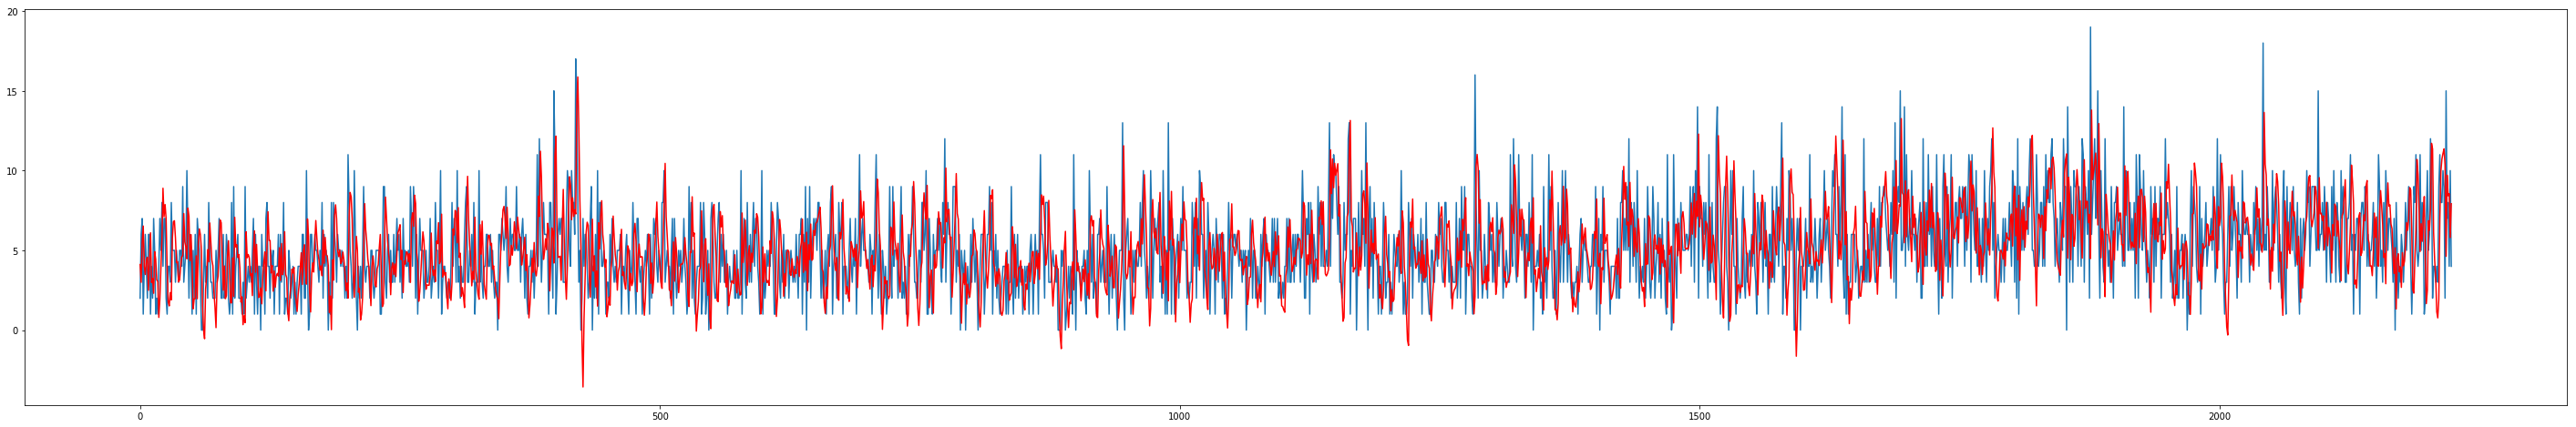

In [28]:
plt.figure(figsize=(50,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()